In [36]:
%matplotlib inline

In [37]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# For unit testing answers.
from unittest.mock import patch

In [76]:
# YOUR CODE HERE
#raise NotImplementedError()

df = pd.read_excel('/Users/katiewhittington/Desktop/courseworkdata/births-trends-london-data.xls',
                  sheet_name='Table 1',usecols='A,B,C,D', skiprows=[0,1])

df.columns = ['Borough','2005','2010','2015']

# Show both the head and tail of the dataset.
df.head().append(df.tail())

,Borough,2005,2010,2015
0,Barking & Dagenham,2916,3644.0,3697.0
1,Barnet,4602,5338.0,5222.0
2,Bexley,2758,3010.0,3093.0
3,Brent,4415,5049.0,5157.0
4,Bromley,3599,4142.0,4098.0
35,Outer London,66012,76771.0,77829.0
36,NaN,NaN,NaN,NaN
37,LONDON,114777,130792.0,128520.0
38,NaN,NaN,NaN,NaN
39,Source:,ONS mid-year estimate components of change,NaN,NaN


In [39]:
#number of rows and columns
df.shape

(40, 4)

In [61]:
#missing/null Values
df.isnull().sum()

Borough    3
2005       3
2010       4
2015       4
dtype: int64

In [62]:
# Inspect the DataFrame info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Borough  37 non-null     object 
 1   2005     37 non-null     object 
 2   2010     36 non-null     float64
 3   2015     36 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.4+ KB


In [63]:
# dropping all those rows which  have any missing value in it. 
df.dropna(inplace = True) 
df.isnull().sum()

Borough    0
2005       0
2010       0
2015       0
dtype: int64

In [64]:
#findding whether the dataset contain duplicate rows
df.duplicated().sum()

0

In [65]:
df['Borough'] = df['Borough'].astype('category') 
df['2005'] = df['2005'].astype('category') 
df['2010'] = df['2010'].astype('category') 
df['2015'] = df['2015'].astype('category') 

In [66]:
df.dtypes

Borough    category
2005       category
2010       category
2015       category
dtype: object

In [67]:
ts=df.melt(id_vars=['Borough'],
          var_name='Year',value_name='Population')

ts.head()

,Borough,Year,Population
0,Barking & Dagenham,2005,2916
1,Barnet,2005,4602
2,Bexley,2005,2758
3,Brent,2005,4415
4,Bromley,2005,3599


In [68]:
ts['Year'] = pd.to_datetime(ts['Year'], format='%Y')

ts.set_index('Year', inplace =True)

ts = ts.to_period('Y')
ts.head(4)

,Borough,Population
Year,,
2005,Barking & Dagenham,2916
2005,Barnet,4602
2005,Bexley,2758
2005,Brent,4415


In [69]:
ts.set_index(['Borough'], inplace=True, append=True)
ts.sort_index(inplace=True)
ts.head()

Population
Year Borough                      
2005 Barking & Dagenham       2916
     Barnet                   4602
     Bexley                   2758
     Brent                    4415
     Bromley                  3599

In [70]:
ts.loc[('2005')].head()

Population
Year Borough                      
2005 Barking & Dagenham       2916
     Barnet                   4602
     Bexley                   2758
     Brent                    4415
     Bromley                  3599

In [71]:
#ts.xs('Lewisham',level='Borough').head(3)
ts.loc('Borough').head(3)

ValueError: No axis named Borough for object type <class 'pandas.core.frame.DataFrame'>

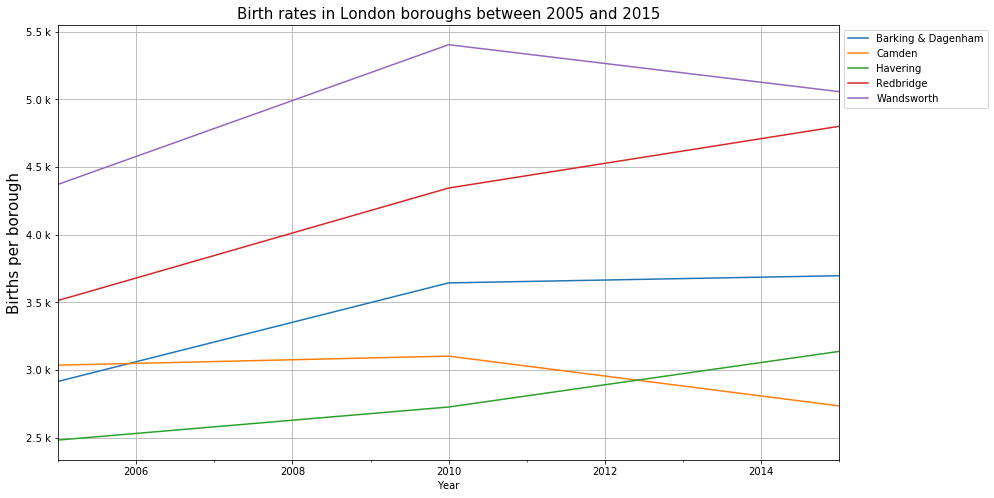

In [97]:
# Remove location from the index because we don’t need it to compare # boroughs.
ts2 = ts.reset_index(level='Borough', drop=True)
# Re-sort the index: required for using slice(). 
ts2.sort_index(inplace=True)
b1 = 'Barking & Dagenham'
#b2 = 'Barnet'
b3 = 'Camden'
#b4 ='Lambeth'
#b5 ='Lewisham'
#b6 = 'Hammersmith & Fulham'
b7 ='Wandsworth'
b8 ='Redbridge'
b9='Havering'
# Select all times, and slice out only boroughs we are interested in.
# Select only density column.
ax = ts.loc[(slice(None), [b1,b3,b7,b8,b9]), 'Population'].unstack().plot(figsize=(14,8),grid=True) 
ax.yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1)) 
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_title('Birth rates in London boroughs between 2005 and 2015',size=15) 
ax.set_ylabel('Births per borough',size=15)
plt.show()

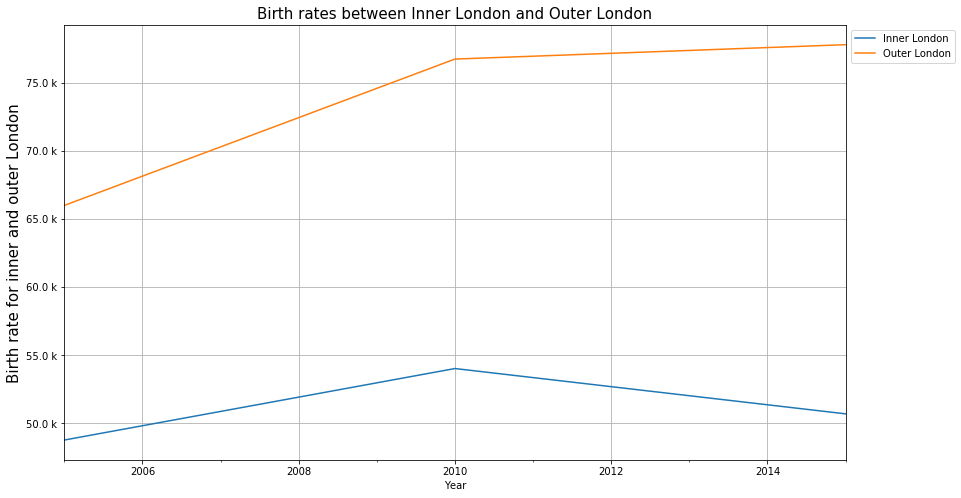

In [98]:
# Remove location from the index because we don’t need it to compare # boroughs.
ts2 = ts.reset_index(level='Borough', drop=True)
# Re-sort the index: required for using slice(). 
ts2.sort_index(inplace=True)
b1 = 'Inner London'
b2 = 'Outer London'

# Select all times, and slice out only boroughs we are interested in.
# Select only density column.
ax = ts.loc[(slice(None), [b1,b2]), 'Population'].unstack().plot(figsize=(14,8),grid=True) 
ax.yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=1)) 
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_title('Birth rates between Inner London and Outer London',size=15) 
ax.set_ylabel('Birth rate for inner and outer London',size=15)
plt.show()

In [5]:
df = pd.read_excel('/Users/katiewhittington/Desktop/courseworkdata/births-trends-london-data.xls',
                  sheet_name='Figure 9',skiprows=[0,1], nrows=35)


#usecols='A,B,C,D', skiprows=[0,1]
# Show both the head and tail of the dataset.
df.head().append(df.tail())

,Age,2001,2011
0,15,0.010428,0.005051
1,16,0.024053,0.011992
2,17,0.043211,0.022535
3,18,0.063061,0.034864
4,19,0.077311,0.045814
30,45,0.007777,0.011624
31,46,0.005508,0.008339
32,47,0.003842,0.005882
33,48,0.002642,0.004085
34,49,0.001793,0.002795


In [59]:
df['Age'].median()

KeyError: 'Age'

In [6]:
#number of rows and columns
df.shape

(35, 3)

In [7]:
df.columns

Index(['Age', 2001, 2011], dtype='object')

In [8]:
df.columns = ['Age','2001','2011']

df.head(5)

,Age,2001,2011
0,15,0.010428,0.005051
1,16,0.024053,0.011992
2,17,0.043211,0.022535
3,18,0.063061,0.034864
4,19,0.077311,0.045814


In [9]:
#missing/null Values
df.isnull().sum()

Age     0
2001    0
2011    0
dtype: int64

In [10]:
# Inspect the DataFrame info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     35 non-null     int64  
 1   2001    35 non-null     float64
 2   2011    35 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 968.0 bytes


In [11]:
# dropping all those rows which  have any missing value in it. 
df.dropna(inplace = True) 
df.isnull().sum()

Age     0
2001    0
2011    0
dtype: int64

In [12]:
#findding whether the dataset contain duplicate rows
df.duplicated().sum()

0

In [13]:
# inspect data dtype
df.dtypes

Age       int64
2001    float64
2011    float64
dtype: object

In [369]:
# inspect data dtype
df.dtypes

Age       int64
2001    float64
2011    float64
dtype: object

In [300]:
df['2001']=df['2001'].round(3)
df['2011']=df['2011'].round(3)

In [360]:
df.melt(id_vars=['Age'],
          var_name='Year',value_name='Fertinity rate curve')

df.head()

,Age,2001,2011
0,15,0.010428,0.005051
1,16,0.024053,0.011992
2,17,0.043211,0.022535
3,18,0.063061,0.034864
4,19,0.077311,0.045814


In [14]:
df.columns

Index(['Age', '2001', '2011'], dtype='object')

In [15]:
df.set_index('Age', inplace =True)


df.head(4)

,2001,2011
Age,,
15,0.010428,0.005051
16,0.024053,0.011992
17,0.043211,0.022535
18,0.063061,0.034864


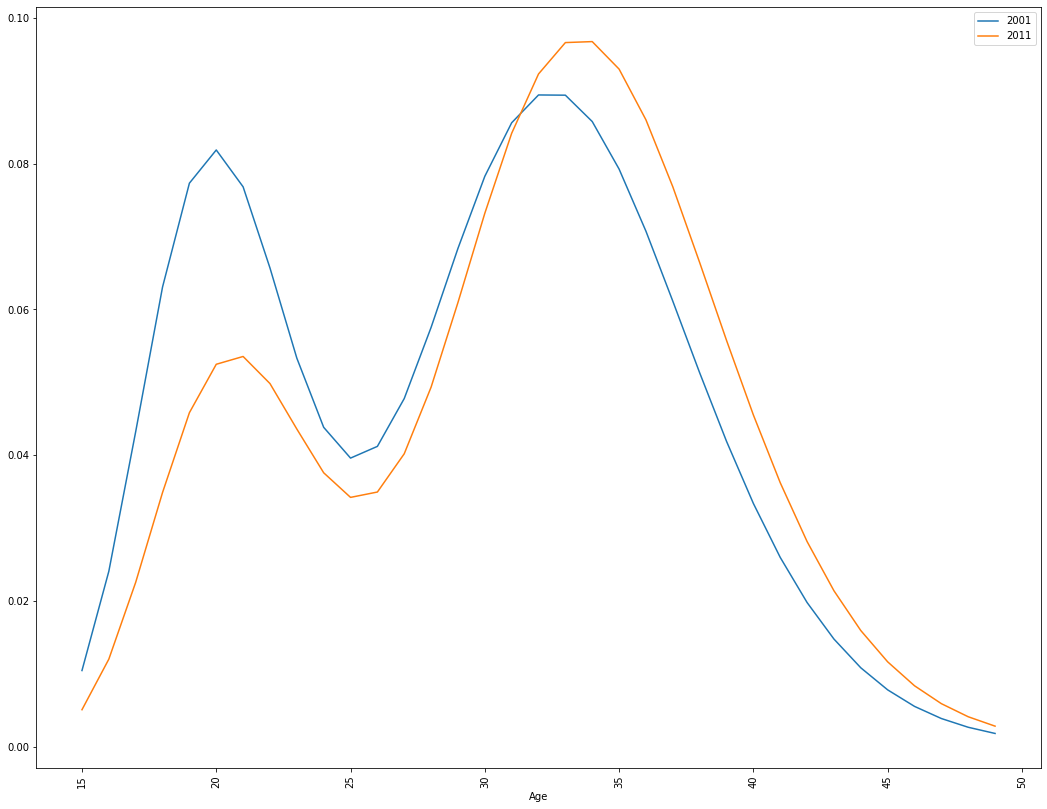

In [16]:
ax = df[['2001','2011']].plot(rot=90,figsize=(18,14))

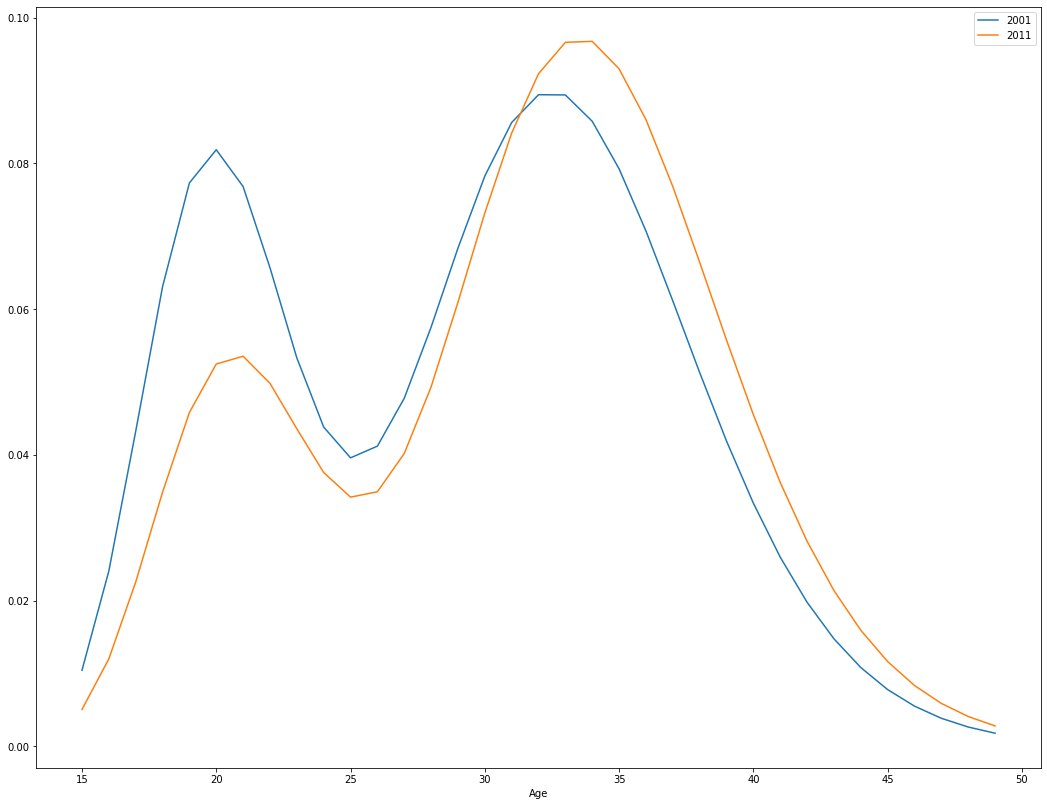

In [367]:
ax = df.plot(x='Age',rot=0,figsize=(18,14))

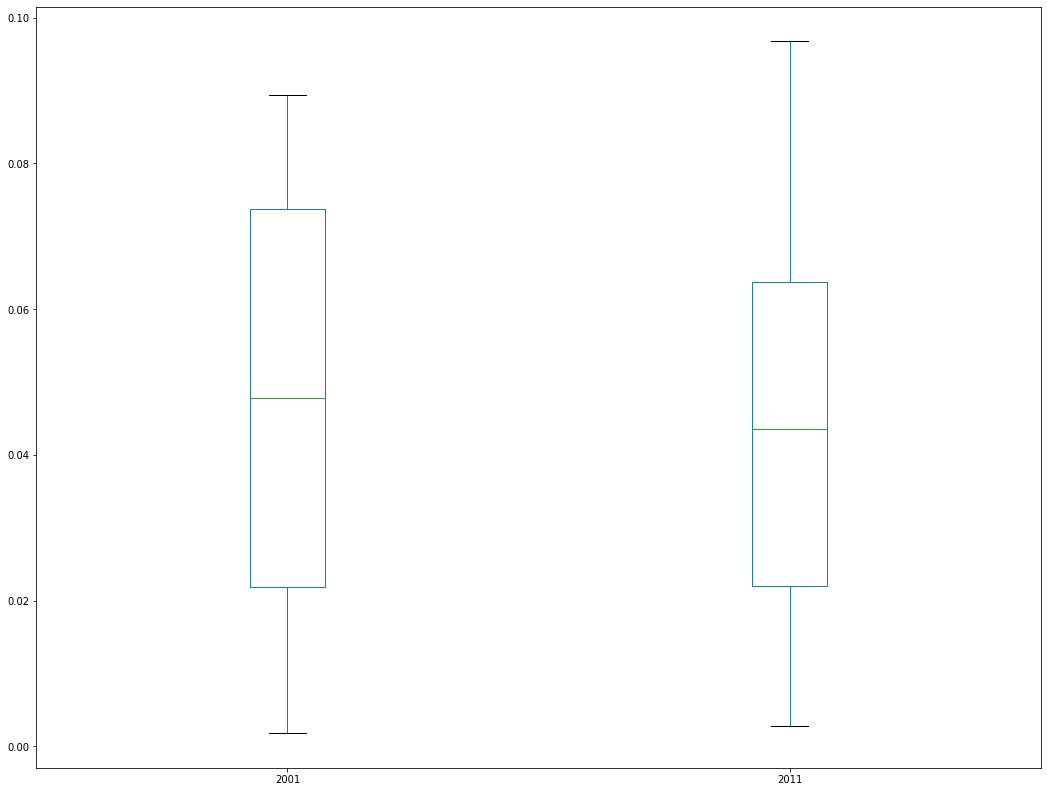

In [35]:
ax = df.plot.box(rot=0,figsize=(18,14))

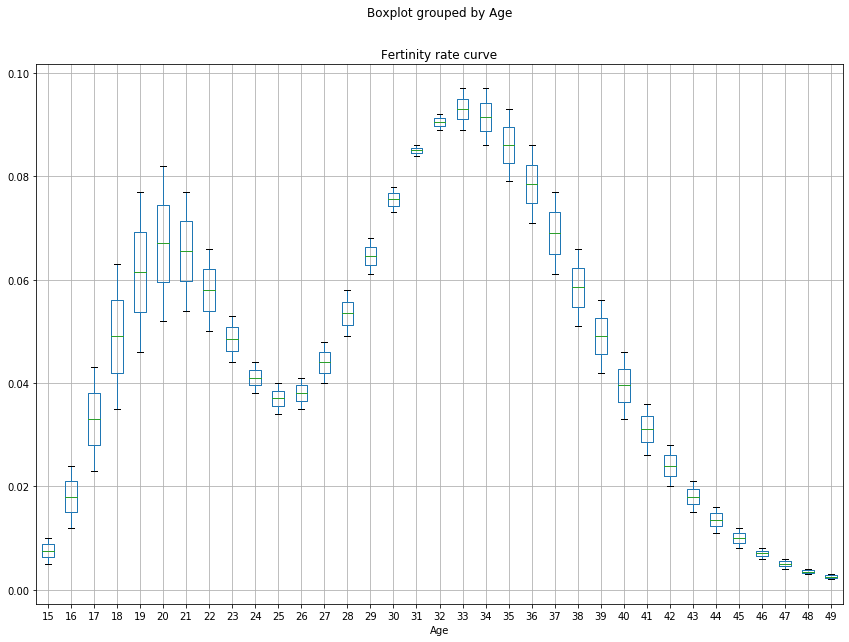

<Figure size 1080x504 with 0 Axes>

In [325]:
ts.boxplot(column = 'Fertinity rate curve', by = 'Age',figsize=(14,10))
fig = plt.figure(figsize=(15,7))
plt.show()

In [56]:
df['Age'].median()

KeyError: 'Age'